In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import numpy as np

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X = df.iloc[:, :-1]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
X_mean = X.mean()
X_mean

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [9]:
X_std = X.std()
X_std

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [10]:
X_norm = (X - X_mean) / X_std
X_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [11]:
y = df["target"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [13]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,-1.501490,1.245030,-1.562342,-1.311052
15,-0.173094,3.080455,-1.279104,-1.048667
65,1.034539,0.097889,0.363678,0.263260
11,-1.259964,0.786174,-1.222456,-1.311052
42,-1.743017,0.327318,-1.392399,-1.311052
...,...,...,...,...
71,0.309959,-0.590395,0.137087,0.132067
106,-1.139200,-1.278680,0.420326,0.656838
14,-0.052331,2.162743,-1.449047,-1.311052
92,-0.052331,-1.049251,0.137087,0.000875


In [14]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int32

In [15]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,0.309959,-0.590395,0.533621,0.000875
18,-0.173094,1.703886,-1.165809,-1.179859
118,2.242172,-1.049251,1.779869,1.443994
78,0.189196,-0.360967,0.420326,0.394453
76,1.155302,-0.590395,0.590269,0.263260
31,-0.535384,0.786174,-1.279104,-1.048667
64,-0.293857,-0.360967,-0.089503,0.132067
141,1.276066,0.097889,0.760211,1.443994
68,0.430722,-1.966964,0.420326,0.394453
82,-0.052331,-0.819823,0.080440,0.000875


In [16]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: target, dtype: int32

In [17]:
model = Sequential([
    Dense(
        20,
        input_shape=(4,),
        kernel_initializer='he_uniform',
        bias_initializer='zeros'
    ),
    BatchNormalization(),
    ReLU(),
    Dropout(0.5),

    Dense(
        10,
        kernel_initializer='he_uniform',
        bias_initializer='zeros'
    ),
    BatchNormalization(),
    ReLU(),
    Dropout(0.5),

    Dense(
        3,
        activation='softmax',
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros'
    )
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 20)                0         
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                        

In [24]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.9,
    patience=10,
    min_lr=1e-6,
    verbose=0
)

In [26]:
best_model_save = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

In [27]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=1000,
    batch_size=32,
    callbacks=[reduce_lr, best_model_save],
    verbose=0
)

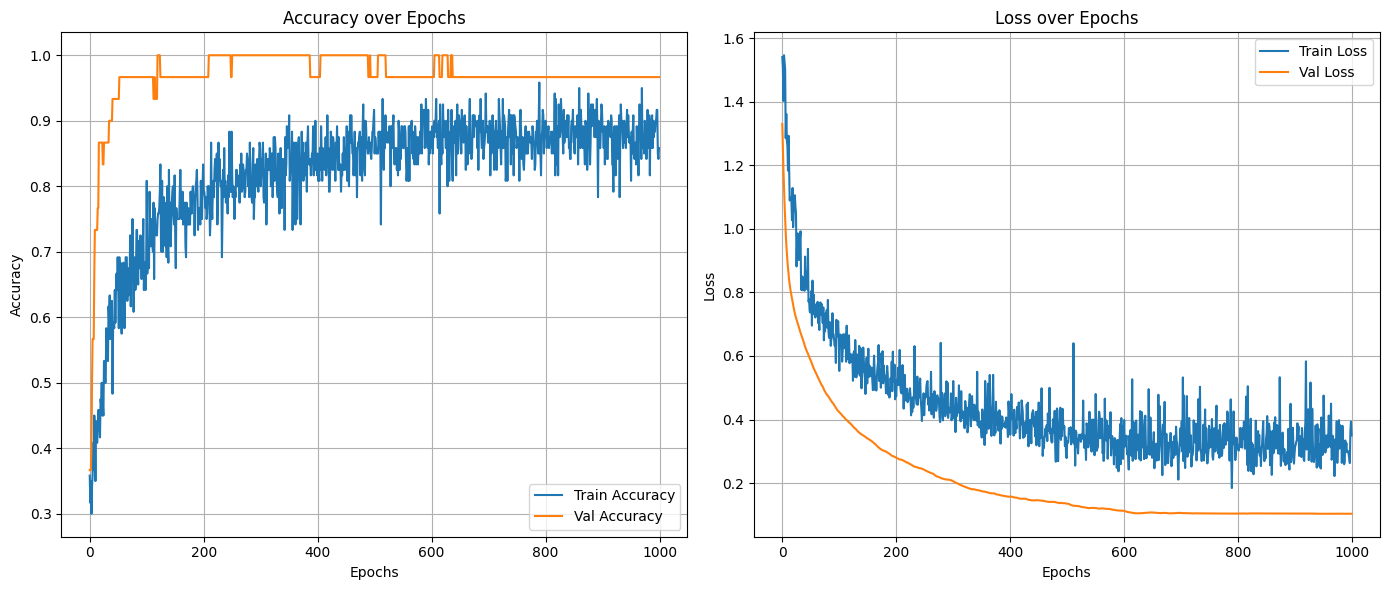

In [32]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [35]:
print("\n저장된 최적 모델 로드 중...")

best_model = load_model('best_model.h5')

loss, acc = best_model.evaluate(
    X_test,
    y_test,
    verbose=0
)

print(f'\n저장된 모델 기준 테스틑 정확도: {acc*100:.2f}%')


저장된 최적 모델 로드 중...

저장된 모델 기준 테스틑 정확도: 96.67%


In [36]:
new_iris_data = [[5.8, 2.8, 5.1, 2.4]]
new_iris_data

[[5.8, 2.8, 5.1, 2.4]]

In [37]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [38]:
new_iris_df = pd.DataFrame(new_iris_data, columns=X.columns)
new_iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.8,2.8,5.1,2.4


In [39]:
new_iris_norm = (new_iris_df - X_mean) / X_std
new_iris_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.052331,-0.590395,0.760211,1.575187


In [40]:
prediction = best_model.predict(new_iris_norm)
prediction

1/1 [==============================] - 0s 71ms/step


array([[6.4508669e-08, 2.7180969e-04, 9.9972814e-01]], dtype=float32)

In [41]:
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
predicted_class = np.argmax(prediction)
predicted_class

2

In [43]:
predicted_species = class_names[predicted_class]

print(f"\n새로운 붓꽃 데이터의 예측 품종: {predicted_species}")


새로운 붓꽃 데이터의 예측 품종: virginica
